# Big Data CW2: Project
# Thailand Mobility and Covid Case Study



### 1. Import Data and Read Data from CSV files

#### Mobility Data: df_mobility, limiting to only required columns
#### Covid-19 Data:df_covid, limiting to only required columns

In [69]:
### import packages and set directory of where data is located
import pandas as pd
#always change pandas float display format to 2 decimal points
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('mode.chained_assignment', None)
import numpy as np
import datetime as dt
import seaborn
import matplotlib
import os
import matplotlib.pyplot as plt
import matplotlib.dates as md
os.getcwd()
path=r"C:\Users\neetm\Desktop\CW Big Data"
os.chdir(path)

In [70]:
### specify columns needed for mobility data and import csv to avoid low memory from high columns
col_mob = ['country_region_code', 'country_region','date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']
df_mobility=pd.read_csv("Global_Mobility_Report.csv",usecols=col_mob)
print(len(df_mobility))
display(df_mobility.head())

9503416


,country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,2020-02-15,0.00,4.00,5.00,0.00,2.00,1.00
1,AE,United Arab Emirates,2020-02-16,1.00,4.00,4.00,1.00,2.00,1.00
2,AE,United Arab Emirates,2020-02-17,-1.00,1.00,5.00,1.00,2.00,1.00
3,AE,United Arab Emirates,2020-02-18,-2.00,1.00,5.00,0.00,2.00,1.00
4,AE,United Arab Emirates,2020-02-19,-2.00,0.00,4.00,-1.00,2.00,1.00


In [71]:
### specify columns needed for covid data and import csv to avoid low memory from high columns
col_cov = ['continent', 'location', 'date',"new_cases", "new_deaths","people_vaccinated","people_fully_vaccinated"]
df_covid=pd.read_csv("owid-covid-data.csv",usecols=col_cov)
print(df_covid.shape)
display (df_covid.head())

(179205, 7)


,continent,location,date,new_cases,new_deaths,people_vaccinated,people_fully_vaccinated
0,Asia,Afghanistan,2020-02-24,5.00,NaN,NaN,NaN
1,Asia,Afghanistan,2020-02-25,0.00,NaN,NaN,NaN
2,Asia,Afghanistan,2020-02-26,0.00,NaN,NaN,NaN
3,Asia,Afghanistan,2020-02-27,0.00,NaN,NaN,NaN
4,Asia,Afghanistan,2020-02-28,0.00,NaN,NaN,NaN


In [72]:
#filter dataframe and create new dataframe for both mobility and covid data sets: focus Thailand

df_th_mob = df_mobility.loc[(df_mobility['country_region'] == 'Thailand')] #filter only Thailand country create new dataframe df_th_mob
df_th_cov = df_covid.loc[(df_covid['location'] == 'Thailand')] #filter only Thailand country create new dataframe df_th_cov

In [73]:
### Data cleaning
### Change date format
df_th_mob.loc[:,'date'] = pd.to_datetime(df_th_mob['date'])
df_th_cov.loc[:,'date'] = pd.to_datetime(df_th_cov['date'])
### fill na = 0 for required columns
df_th_mob[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']] = df_th_mob[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].fillna(value=0)
df_th_cov[['new_cases', 'new_deaths', 'people_vaccinated',
       'people_fully_vaccinated']] = df_th_cov[['new_cases', 'new_deaths', 'people_vaccinated',
       'people_fully_vaccinated']].fillna(value=0)

In [74]:
#display df_th_mob - display thailand mobility data
print(df_th_mob.shape)
display(df_th_mob.head())
display(df_th_mob.describe())

(789, 9)


,country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
6882943,TH,Thailand,2020-02-15,-3.00,1.00,-8.00,-2.00,7.00,1.00
6882944,TH,Thailand,2020-02-16,-3.00,2.00,-5.00,-4.00,2.00,2.00
6882945,TH,Thailand,2020-02-17,-3.00,1.00,-3.00,-4.00,2.00,1.00
6882946,TH,Thailand,2020-02-18,-3.00,0.00,-5.00,-6.00,0.00,2.00
6882947,TH,Thailand,2020-02-19,-4.00,-3.00,-3.00,-6.00,0.00,1.00


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,789.00,789.00,789.00,789.00,789.00,789.00
mean,-10.33,9.81,-25.02,-37.61,-13.99,5.26
std,14.28,12.90,14.83,13.91,12.63,5.30
min,-55.00,-27.00,-58.00,-69.00,-70.00,-5.00
25%,-18.00,1.00,-36.00,-50.00,-20.00,1.00
50%,-8.00,7.00,-24.00,-35.00,-12.00,4.00
75%,-1.00,20.00,-16.00,-27.00,-6.00,9.00
max,24.00,59.00,49.00,-2.00,11.00,23.00


In [75]:
print(df_th_cov.shape)
display (df_th_cov.head())
display (df_th_cov.describe())

(833, 7)


,continent,location,date,new_cases,new_deaths,people_vaccinated,people_fully_vaccinated
159254,Asia,Thailand,2020-01-04,0.00,0.00,0.00,0.00
159255,Asia,Thailand,2020-01-05,0.00,0.00,0.00,0.00
159256,Asia,Thailand,2020-01-06,0.00,0.00,0.00,0.00
159257,Asia,Thailand,2020-01-07,0.00,0.00,0.00,0.00
159258,Asia,Thailand,2020-01-08,0.00,0.00,0.00,0.00


,new_cases,new_deaths,people_vaccinated,people_fully_vaccinated
count,833.00,833.00,833.00,833.00
mean,"4,816.56",32.12,"13,297,164.20","10,588,934.72"
std,"7,880.19",57.59,"20,689,560.00","18,330,479.88"
min,0.00,0.00,0.00,0.00
25%,5.00,0.00,0.00,0.00
50%,175.00,1.00,0.00,0.00
75%,"7,574.00",38.00,"24,918,054.00","9,698,842.00"
max,"52,284.00",312.00,"55,849,949.00","50,520,022.00"


In [76]:
## Create dates to join
##df_th_mob.to_csv('df_th_mob.csv') to check data format
###df_th_cov.to_csv('df_th_cov.csv')
df_th_cov['date'] = pd.to_datetime(df_th_cov['date'], format='%y%m%d')
#df['Dates'] = pd.to_datetime(df['Dates'], format='%y%m%d')
print(df_th_cov.columns)
#change data type

Index(['continent', 'location', 'date', 'new_cases', 'new_deaths',
       'people_vaccinated', 'people_fully_vaccinated'],
      dtype='object')


In [77]:
df_th_cov.head()

,continent,location,date,new_cases,new_deaths,people_vaccinated,people_fully_vaccinated
159254,Asia,Thailand,2020-01-04,0.00,0.00,0.00,0.00
159255,Asia,Thailand,2020-01-05,0.00,0.00,0.00,0.00
159256,Asia,Thailand,2020-01-06,0.00,0.00,0.00,0.00
159257,Asia,Thailand,2020-01-07,0.00,0.00,0.00,0.00
159258,Asia,Thailand,2020-01-08,0.00,0.00,0.00,0.00


In [78]:
#dates and string dates for df cov th
df_th_cov['Year'] = df_th_cov['date'].dt.year
df_th_cov['Month'] = df_th_cov['date'].dt.month
df_th_cov['Month_Year'] = pd.to_datetime(df_th_cov['date'], format='%Y%m%d').dt.strftime('%b-%Y')
df_th_cov['M_Year'] = pd.to_datetime(df_th_cov['date'], format='%Y%m%d').dt.strftime('%m-%Y')
df_th_cov['Week'] = pd.to_datetime(df_th_cov['date'], format='%Y%m%d').dt.isocalendar().week
df_th_cov[['Year', 'Month','Month_Year', 'M_Year', 'Week']] = df_th_cov[['Year', 'Month','Month_Year', 'M_Year', 'Week']].astype(str)
df_th_cov['Week-Year'] = (df_th_cov['Week']+'-'+df_th_cov['Year']).astype(str)
df_th_cov = df_th_cov[['Year', 'Month','Month_Year', 'M_Year', 'Week', 
             'Week-Year','continent', 'location', 'date', 'new_cases', 
             'new_deaths','people_vaccinated', 'people_fully_vaccinated']]
display(df_th_cov.head())

,Year,Month,Month_Year,M_Year,Week,Week-Year,continent,location,date,new_cases,new_deaths,people_vaccinated,people_fully_vaccinated
159254,2020,1,Jan-2020,01-2020,1,1-2020,Asia,Thailand,2020-01-04,0.00,0.00,0.00,0.00
159255,2020,1,Jan-2020,01-2020,1,1-2020,Asia,Thailand,2020-01-05,0.00,0.00,0.00,0.00
159256,2020,1,Jan-2020,01-2020,2,2-2020,Asia,Thailand,2020-01-06,0.00,0.00,0.00,0.00
159257,2020,1,Jan-2020,01-2020,2,2-2020,Asia,Thailand,2020-01-07,0.00,0.00,0.00,0.00
159258,2020,1,Jan-2020,01-2020,2,2-2020,Asia,Thailand,2020-01-08,0.00,0.00,0.00,0.00


In [79]:
df_th_mob['Year'] = df_th_mob['date'].dt.year
df_th_mob['Month'] = df_th_mob['date'].dt.month
df_th_mob['Month_Year'] = pd.to_datetime(df_th_mob['date'], format='%Y%m%d').dt.strftime('%b-%Y')
df_th_mob['M_Year'] = pd.to_datetime(df_th_mob['date'], format='%Y%m%d').dt.strftime('%m-%Y')
df_th_mob['Week'] = pd.to_datetime(df_th_mob['date'], format='%Y%m%d').dt.isocalendar().week
df_th_mob[['Year', 'Month','Month_Year', 'M_Year', 'Week']] = df_th_mob[['Year', 'Month','Month_Year', 'M_Year', 'Week']].astype(str)
df_th_mob['Week-Year'] = (df_th_mob['Week']+'-'+df_th_mob['Year']).astype(str)
df_th_mob = df_th_mob[['Year', 'Month','Month_Year', 'M_Year', 'Week', 
             'Week-Year','country_region_code', 'country_region', 'date','retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']]
display(df_th_mob.head())

,Year,Month,Month_Year,M_Year,Week,Week-Year,country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
6882943,2020,2,Feb-2020,02-2020,7,7-2020,TH,Thailand,2020-02-15,-3.00,1.00,-8.00,-2.00,7.00,1.00
6882944,2020,2,Feb-2020,02-2020,7,7-2020,TH,Thailand,2020-02-16,-3.00,2.00,-5.00,-4.00,2.00,2.00
6882945,2020,2,Feb-2020,02-2020,8,8-2020,TH,Thailand,2020-02-17,-3.00,1.00,-3.00,-4.00,2.00,1.00
6882946,2020,2,Feb-2020,02-2020,8,8-2020,TH,Thailand,2020-02-18,-3.00,0.00,-5.00,-6.00,0.00,2.00
6882947,2020,2,Feb-2020,02-2020,8,8-2020,TH,Thailand,2020-02-19,-4.00,-3.00,-3.00,-6.00,0.00,1.00


In [80]:
## create metrics for the data 
df_th_mob['Total_Mobility'] = df_th_mob[['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
                                       'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline']].mean(axis=1)
df_th_mob['No_Mobility'] = df_th_mob[['residential_percent_change_from_baseline']]
df_th_mob.head()

,Year,Month,Month_Year,M_Year,Week,Week-Year,country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Total_Mobility,No_Mobility
6882943,2020,2,Feb-2020,02-2020,7,7-2020,TH,Thailand,2020-02-15,-3.00,1.00,-8.00,-2.00,7.00,1.00,-1.00,1.00
6882944,2020,2,Feb-2020,02-2020,7,7-2020,TH,Thailand,2020-02-16,-3.00,2.00,-5.00,-4.00,2.00,2.00,-1.60,2.00
6882945,2020,2,Feb-2020,02-2020,8,8-2020,TH,Thailand,2020-02-17,-3.00,1.00,-3.00,-4.00,2.00,1.00,-1.40,1.00
6882946,2020,2,Feb-2020,02-2020,8,8-2020,TH,Thailand,2020-02-18,-3.00,0.00,-5.00,-6.00,0.00,2.00,-2.80,2.00
6882947,2020,2,Feb-2020,02-2020,8,8-2020,TH,Thailand,2020-02-19,-4.00,-3.00,-3.00,-6.00,0.00,1.00,-3.20,1.00


In [81]:
#df_th_cov = df_th_cov [(df_th_cov['date'] > '2020-04-01') & (df_th_cov['date'] < '2021-12-31')]

In [82]:
df_th_mob.head()

,Year,Month,Month_Year,M_Year,Week,Week-Year,country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Total_Mobility,No_Mobility
6882943,2020,2,Feb-2020,02-2020,7,7-2020,TH,Thailand,2020-02-15,-3.00,1.00,-8.00,-2.00,7.00,1.00,-1.00,1.00
6882944,2020,2,Feb-2020,02-2020,7,7-2020,TH,Thailand,2020-02-16,-3.00,2.00,-5.00,-4.00,2.00,2.00,-1.60,2.00
6882945,2020,2,Feb-2020,02-2020,8,8-2020,TH,Thailand,2020-02-17,-3.00,1.00,-3.00,-4.00,2.00,1.00,-1.40,1.00
6882946,2020,2,Feb-2020,02-2020,8,8-2020,TH,Thailand,2020-02-18,-3.00,0.00,-5.00,-6.00,0.00,2.00,-2.80,2.00
6882947,2020,2,Feb-2020,02-2020,8,8-2020,TH,Thailand,2020-02-19,-4.00,-3.00,-3.00,-6.00,0.00,1.00,-3.20,1.00


## Weekly Aggregation of Data in Both Mobility and Covid Files

In [83]:
#df1 = wk_mob.merge(wk_cov[['new_cases', 'new_deaths','people_vaccinated','people_fully_vaccinated', 'Week-Year']], how = 'left',
                #left_on = 'Week-Year', right_on = 'Week-Year')

#df1.rename(columns={'$retail_and_recreation_percent_change_from_baseline':'retail_and_recreation % from base', '$grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy_% from base', '$parks_percent_change_from_baseline':'parks_% from base', '$transit_stations_percent_change_from_baseline':'transit_stations%frombase', '$workplaces_percent_change_from_baseline':'workplaces%changefrombase'})
#df1

In [84]:
df_daily = df_th_cov.merge(df_th_mob, how ='left',on='date')
df_daily.head()
df_daily.columns
df_daily.head()

,Year_x,Month_x,Month_Year_x,M_Year_x,Week_x,Week-Year_x,continent,location,date,new_cases,...,country_region_code,country_region,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Total_Mobility,No_Mobility
0,2020,1,Jan-2020,01-2020,1,1-2020,Asia,Thailand,2020-01-04,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,Jan-2020,01-2020,1,1-2020,Asia,Thailand,2020-01-05,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,Jan-2020,01-2020,2,2-2020,Asia,Thailand,2020-01-06,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,Jan-2020,01-2020,2,2-2020,Asia,Thailand,2020-01-07,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,Jan-2020,01-2020,2,2-2020,Asia,Thailand,2020-01-08,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_daily.head()

,Year_x,Month_x,Month_Year_x,M_Year_x,Week_x,Week-Year_x,continent,location,date,new_cases,...,country_region_code,country_region,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Total_Mobility,No_Mobility
0,2020,1,Jan-2020,01-2020,1,1-2020,Asia,Thailand,2020-01-04,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,Jan-2020,01-2020,1,1-2020,Asia,Thailand,2020-01-05,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,Jan-2020,01-2020,2,2-2020,Asia,Thailand,2020-01-06,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,Jan-2020,01-2020,2,2-2020,Asia,Thailand,2020-01-07,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,Jan-2020,01-2020,2,2-2020,Asia,Thailand,2020-01-08,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df_daily=df_daily.loc[:,['Year_x', 'Month_x', 'Month_Year_x', 'M_Year_x', 'Week_x',
       'Week-Year_x', 'continent', 'location', 'date', 'new_cases',
       'new_deaths', 'people_vaccinated', 'people_fully_vaccinated','retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'Total_Mobility',
       'No_Mobility']]
df_daily.rename(columns={'Year_x': 'Year', 'Month_x': 'Month','Month_Year_x':'Month_Year','M_Year_x':'M_Year','Week_x':'Week','Week-Year_x':'Week-Year'})

,Year,Month,Month_Year,M_Year,Week,Week-Year,continent,location,date,new_cases,...,people_vaccinated,people_fully_vaccinated,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Total_Mobility,No_Mobility
0,2020,1,Jan-2020,01-2020,1,1-2020,Asia,Thailand,2020-01-04,0.00,...,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,Jan-2020,01-2020,1,1-2020,Asia,Thailand,2020-01-05,0.00,...,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,Jan-2020,01-2020,2,2-2020,Asia,Thailand,2020-01-06,0.00,...,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,Jan-2020,01-2020,2,2-2020,Asia,Thailand,2020-01-07,0.00,...,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,Jan-2020,01-2020,2,2-2020,Asia,Thailand,2020-01-08,0.00,...,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,2022,4,Apr-2022,04-2022,15,15-2022,Asia,Thailand,2022-04-11,"19,982.00",...,"55,829,715.00","50,494,875.00",2.00,28.00,11.00,-29.00,-23.00,11.00,-2.20,11.00
829,2022,4,Apr-2022,04-2022,15,15-2022,Asia,Thailand,2022-04-12,0.00,...,"55,847,558.00","50,518,220.00",6.00,35.00,20.00,-26.00,-30.00,11.00,1.00,11.00
830,2022,4,Apr-2022,04-2022,15,15-2022,Asia,Thailand,2022-04-13,"47,149.00",...,"55,848,828.00","50,519,218.00",3.00,32.00,48.00,-33.00,-64.00,16.00,-2.80,16.00
831,2022,4,Apr-2022,04-2022,15,15-2022,Asia,Thailand,2022-04-14,"20,289.00",...,"55,849,949.00","50,520,022.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df_daily.columns
df_cov_daily = df_th_cov[['Year', 'Month', 'Month_Year', 'M_Year', 'Week', 'Week-Year',
       'continent', 'location', 'date', 'new_cases', 'new_deaths']]
df_cov_daily = pd.melt(df_cov_daily, id_vars =['Year', 'Month', 'Month_Year', 'M_Year', 'Week', 'Week-Year',
       'continent', 'location', 'date'], value_vars =['new_cases', 'new_deaths'])

In [88]:
df_daily = df_daily[['date', 'new_cases',
       'new_deaths', 'people_vaccinated', 'people_fully_vaccinated',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'Total_Mobility',
       'No_Mobility']]
df_daily[['new_cases',
       'new_deaths', 'people_vaccinated', 'people_fully_vaccinated',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'Total_Mobility',
       'No_Mobility']] = df_daily[['new_cases',
       'new_deaths', 'people_vaccinated', 'people_fully_vaccinated',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'Total_Mobility',
       'No_Mobility']].fillna(value=0)

df_daily.head()

,date,new_cases,new_deaths,people_vaccinated,people_fully_vaccinated,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Total_Mobility,No_Mobility
0,2020-01-04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-01-05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-01-06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-01-07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-01-08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [89]:
df_daily['date'] = pd.to_datetime(df_daily['date'], errors='coerce')

In [90]:
df_daily['date'] = pd.to_datetime(df_daily['date'], format='%Y-%m-%d', errors='coerce').ffill()

In [91]:
df_daily.head()

df_daily['Week_Number'] = df_daily['date'].dt.isocalendar().week 
# Getting year. Weeknum is common across years to we need to create unique index by using year and weeknum
df_daily['Year'] = df_daily['date'].dt.year

# Grouping based on required values
df2 = df_daily.groupby(['Year','Week_Number']).agg({'date':'min','new_cases':'sum', 
                                              'new_deaths':'sum', 
                                              'people_vaccinated':'max', 
                                              'people_fully_vaccinated':'max',
                                              'retail_and_recreation_percent_change_from_baseline':'mean',
                                             'grocery_and_pharmacy_percent_change_from_baseline':'mean',
                                             'parks_percent_change_from_baseline':'mean',
                                             'transit_stations_percent_change_from_baseline':'mean',
                                             'workplaces_percent_change_from_baseline':'mean',
                                             'residential_percent_change_from_baseline':'mean',
                                             'Total_Mobility':'mean',
                                             'No_Mobility':'mean'})

df2 = df2.reset_index()

In [92]:
display(df2.head())
display(df2.dtypes)
df2.to_csv('df2weekly.csv')

,Year,Week_Number,date,new_cases,new_deaths,people_vaccinated,people_fully_vaccinated,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Total_Mobility,No_Mobility
0,2020,1,2020-01-04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2020,2,2020-01-06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2020,3,2020-01-13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2020,4,2020-01-20,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2020,5,2020-01-27,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Year                                                           int64
Week_Number                                                    int64
date                                                  datetime64[ns]
new_cases                                                    float64
new_deaths                                                   float64
people_vaccinated                                            float64
people_fully_vaccinated                                      float64
retail_and_recreation_percent_change_from_baseline           float64
grocery_and_pharmacy_percent_change_from_baseline            float64
parks_percent_change_from_baseline                           float64
transit_stations_percent_change_from_baseline                float64
workplaces_percent_change_from_baseline                      float64
residential_percent_change_from_baseline                     float64
Total_Mobility                                               float64
No_Mobility                       

In [93]:
#Standardize values in each column
from sklearn.preprocessing import StandardScaler
df2_stand = StandardScaler().fit_transform(df2[['new_cases', 'new_deaths', 'people_vaccinated',
       'people_fully_vaccinated',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'Total_Mobility',
       'No_Mobility']])


df2[['new_cases', 'new_deaths', 'people_vaccinated',
     'people_fully_vaccinated',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'Total_Mobility',
       'No_Mobility']] = StandardScaler().fit_transform(df2[['new_cases', 'new_deaths', 'people_vaccinated',
       'people_fully_vaccinated',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'Total_Mobility',
       'No_Mobility']])

In [94]:
df2.head()

,Year,Week_Number,date,new_cases,new_deaths,people_vaccinated,people_fully_vaccinated,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Total_Mobility,No_Mobility
0,2020,1,2020-01-04,-0.65,-0.57,-0.67,-0.60,0.70,-0.76,1.55,2.25,1.41,-0.99,1.37,-0.99
1,2020,2,2020-01-06,-0.65,-0.57,-0.67,-0.60,0.70,-0.76,1.55,2.25,1.41,-0.99,1.37,-0.99
2,2020,3,2020-01-13,-0.65,-0.57,-0.67,-0.60,0.70,-0.76,1.55,2.25,1.41,-0.99,1.37,-0.99
3,2020,4,2020-01-20,-0.65,-0.57,-0.67,-0.60,0.70,-0.76,1.55,2.25,1.41,-0.99,1.37,-0.99
4,2020,5,2020-01-27,-0.65,-0.57,-0.67,-0.60,0.70,-0.76,1.55,2.25,1.41,-0.99,1.37,-0.99


### Create L2 data set weekly aggregation for Hypothesis 2 onwards

In [95]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y%m%d', errors='raise')
start_date='2020-04-01'
end_date='2021-12-31'
mask2 = (df2['date']<='2021-12-31')
df2 = df2.loc[mask2]
df2['Year'] = df2['date'].dt.year
df2['Month'] = df2['date'].dt.month
df2['Month_Year'] = pd.to_datetime(df2['date'], format='%Y%m%d').dt.strftime('%b-%Y')
mask = (df2['date']>='2020-04-01')& (df2['date']<='2021-12-31')
df2_L2= df2.loc[mask]
df2_L2
df2_L2.to_csv('df2_Vaib.csv')
print('Done')

Done


In [96]:
df2_melt = pd.melt(df2, id_vars =['Year', 'Week_Number', 'date'], value_vars =['new_cases', 'new_deaths', 'people_vaccinated',
       'people_fully_vaccinated',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'Total_Mobility',
       'No_Mobility'])

In [97]:
df2_melt['Month'] = df2_melt['date'].dt.month
df2_melt['Month_Year'] = pd.to_datetime(df2_melt['date'], format='%Y%m%d').dt.strftime('%b-%Y')

In [98]:
covlist = [['new_cases', 'new_deaths']]
cov_vac_list = [['new_cases', 'new_deaths', 'people_vaccinated',
       'people_fully_vaccinated']]

mob_cov = [['new_cases', 'new_deaths','people_fully_vaccinated','Total_Mobility','No_Mobility']]

mob_un = [['Total_Mobility',
       'No_Mobility']]

all_mob = [['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']]

In [99]:
df_cov = df2_melt[df2_melt.variable.isin(['new_cases', 'new_deaths','people_vaccinated'])]

In [100]:
df_mob = df2_melt[df2_melt.variable.isin(['Total_Mobility','new_cases'])]

In [101]:
df_vac_mob = df2_melt[df2_melt.variable.isin(['Total_Mobility','people_vaccinated'])]
df_vac_mob

,Year,Week_Number,date,variable,value,Month,Month_Year
212,2020,1,2020-01-04,people_vaccinated,-0.67,1,Jan-2020
213,2020,2,2020-01-06,people_vaccinated,-0.67,1,Jan-2020
214,2020,3,2020-01-13,people_vaccinated,-0.67,1,Jan-2020
215,2020,4,2020-01-20,people_vaccinated,-0.67,1,Jan-2020
216,2020,5,2020-01-27,people_vaccinated,-0.67,1,Jan-2020
...,...,...,...,...,...,...,...
1161,2021,49,2021-12-06,Total_Mobility,1.16,12,Dec-2021
1162,2021,50,2021-12-13,Total_Mobility,1.21,12,Dec-2021
1163,2021,51,2021-12-20,Total_Mobility,1.34,12,Dec-2021
1164,2021,52,2021-12-27,Total_Mobility,1.85,12,Dec-2021


## Data Visualization

In [102]:
df2_melt.to_csv('df2_check.csv')

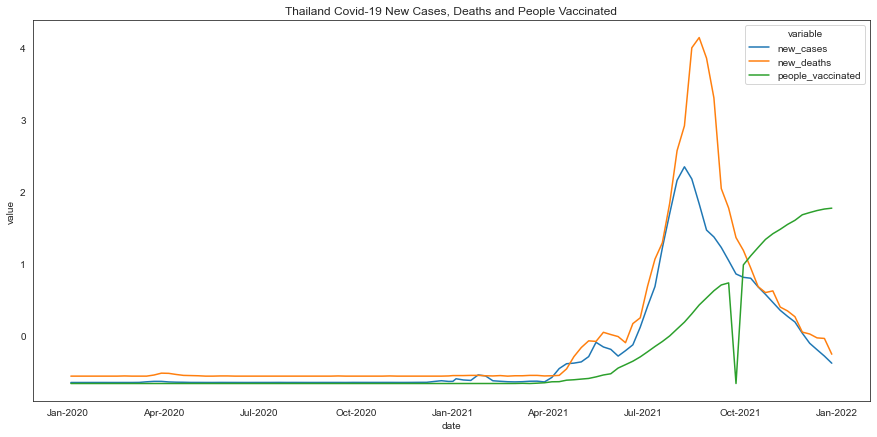

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (15, 7))
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
x="date"
y="value"
# Load an example dataset with long-form data
# Plot the responses for different events and regions
sns.lineplot(x="date", y="value",hue='variable',
             data=df2_melt[df2_melt.variable.isin(['new_cases', 'new_deaths','people_vaccinated'])]).set_title("Thailand Covid-19 New Cases, Deaths and People Vaccinated")
ax.xaxis.set_major_formatter(md.DateFormatter('%b-%Y'))
plt.show()

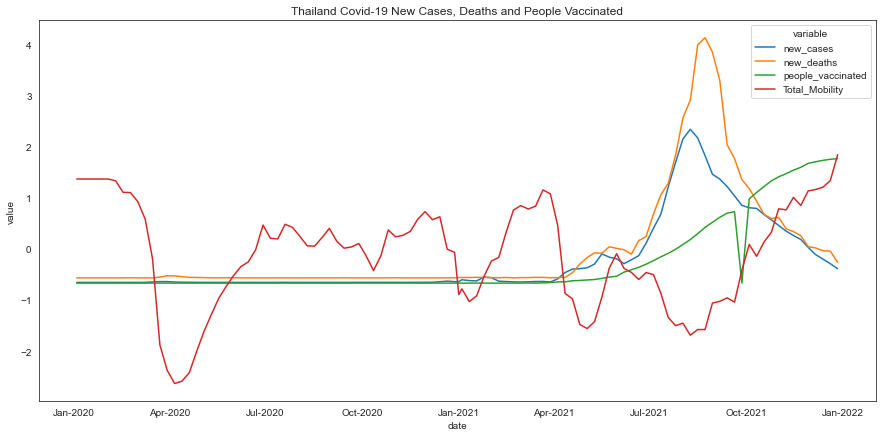

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (15, 7))
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
x="date"
y="value"
# Load an example dataset with long-form data
# Plot the responses for different events and regions
sns.lineplot(x="date", y="value",hue='variable',
             data=df2_melt[df2_melt.variable.isin(['new_cases', 'new_deaths','people_vaccinated','Total_Mobility'])]).set_title("Thailand Covid-19 New Cases, Deaths and People Vaccinated")
ax.xaxis.set_major_formatter(md.DateFormatter('%b-%Y'))
plt.show()

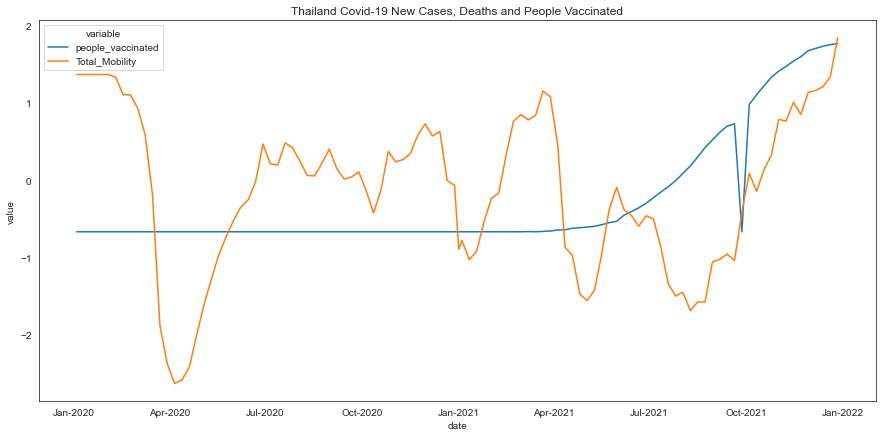

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (15, 7))
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
x="date"
y="value"
# Load an example dataset with long-form data
# Plot the responses for different events and regions
sns.lineplot(x="date", y="value",hue='variable',
             data=df2_melt[df2_melt.variable.isin(['Total_Mobility','people_vaccinated'])]).set_title("Thailand Covid-19 New Cases, Deaths and People Vaccinated")
ax.xaxis.set_major_formatter(md.DateFormatter('%b-%Y'))
plt.show()

In [106]:
df2_L2.describe()

,Year,Week_Number,new_cases,new_deaths,people_vaccinated,people_fully_vaccinated,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Total_Mobility,No_Mobility,Month
count,92.00,92.00,92.00,92.00,92.00,92.00,92.00,92.00,92.00,92.00,92.00,92.00,92.00,92.00,92.00
mean,"2,020.58",29.97,-0.17,0.04,-0.22,-0.26,-0.13,-0.03,-0.25,-0.28,-0.23,0.03,-0.24,0.03,7.10
std,0.50,14.24,0.77,1.11,0.78,0.70,1.01,0.97,0.89,0.83,0.91,1.02,0.93,1.02,3.23
min,"2,020.00",1.00,-0.65,-0.57,-0.67,-0.60,-2.84,-2.36,-1.77,-1.77,-3.29,-1.59,-2.64,-1.59,1.00
25%,"2,020.00",19.00,-0.65,-0.57,-0.67,-0.60,-0.71,-0.57,-0.98,-0.99,-0.74,-0.85,-0.92,-0.85,5.00
50%,"2,021.00",30.50,-0.63,-0.56,-0.67,-0.60,-0.06,-0.31,-0.11,-0.07,-0.16,-0.09,-0.11,-0.09,7.00
75%,"2,021.00",42.00,-0.06,0.08,-0.14,-0.41,0.48,0.68,0.39,0.46,0.39,0.67,0.41,0.67,10.00
max,"2,021.00",53.00,2.34,4.14,1.77,1.87,2.16,2.89,2.59,0.99,1.33,2.77,1.85,2.77,12.00


(-0.3105617859168812, 0.002587217044224364)

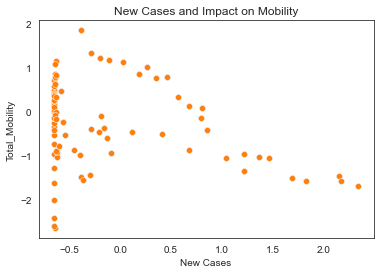

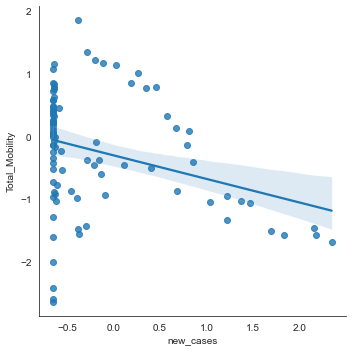

In [107]:
import seaborn as sns
sns.scatterplot(x="new_cases", y="Total_Mobility", data=df2_L2)
ax = sns.scatterplot(x="new_cases", y="Total_Mobility", data=df2_L2)
ax.set_title("New Cases and Impact on Mobility")
ax.set_xlabel("New Cases")
sns.lmplot(x="new_cases", y="Total_Mobility", data=df2_L2)
from scipy import stats
stats.pearsonr(df2_L2['Total_Mobility'], df2_L2['new_cases'])

(-0.3340387599050745, 0.0011371669495878894)

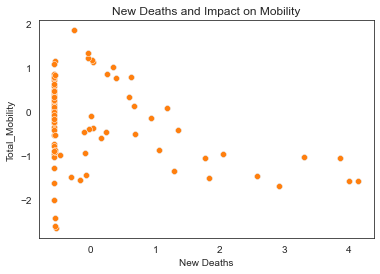

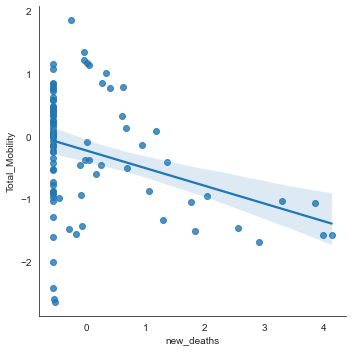

In [108]:
import seaborn as sns
sns.scatterplot(x="new_deaths", y="Total_Mobility", data=df2_L2)
ax = sns.scatterplot(x="new_deaths", y="Total_Mobility", data=df2_L2)
ax.set_title("New Deaths and Impact on Mobility")
ax.set_xlabel("New Deaths")
sns.lmplot(x="new_deaths", y="Total_Mobility", data=df2_L2)
from scipy import stats
stats.pearsonr(df2_L2['Total_Mobility'], df2_L2['new_deaths'])

(0.29444505238523033, 0.0043849772560203126)

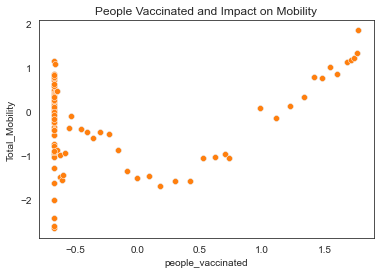

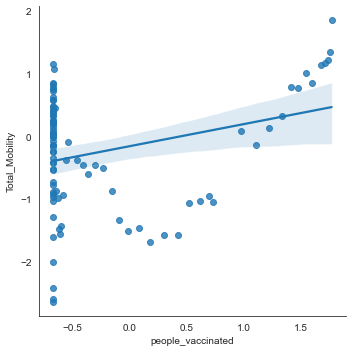

In [109]:
import seaborn as sns
sns.scatterplot(x="people_vaccinated", y="Total_Mobility", data=df2_L2)
ax = sns.scatterplot(x="people_vaccinated", y="Total_Mobility", data=df2_L2)
ax.set_title("People Vaccinated and Impact on Mobility")
ax.set_xlabel("people_vaccinated")
sns.lmplot(x="people_vaccinated", y="Total_Mobility", data=df2_L2)
from scipy import stats
stats.pearsonr(df2_L2['Total_Mobility'], df2_L2['people_vaccinated'])

In [110]:
df3 = df2_L2[['new_cases', 'new_deaths',
       'people_vaccinated', 'people_fully_vaccinated',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'Total_Mobility',
       'No_Mobility']]

''''corre = df3.corr()round(corr,2)ax = sns.heatmap( corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right' '''''
);

#https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html

NameError: name 'corr' is not defined

### First and Second Lockdown April 2020 - Jul 2020 vs. April 2021 to Jul 2021

In [111]:
L1_start='2020-04-01'
L1_end ='2020-07-31'
L2_start='2021-04-07'
L2_end ='2021-07-31'
dfL1 = df2.loc[(df2['date']>=L1_start)&(df2['date']<=L1_end)]
dfrealL2 = df2.loc[(df2['date']>=L2_start)&(df2['date']<=L2_end)]
dfL1['Lockdown'] = 'Lockdown 2020'
dfrealL2['Lockdown'] = 'Lockdown 2021'
dfLktotal = dfL1.append(dfrealL2, ignore_index=False, verify_integrity=False, sort=False)
dfLktotal['Month_Name'] = pd.to_datetime(dfLktotal['date'], format='%Y%m%d').dt.strftime('%b')

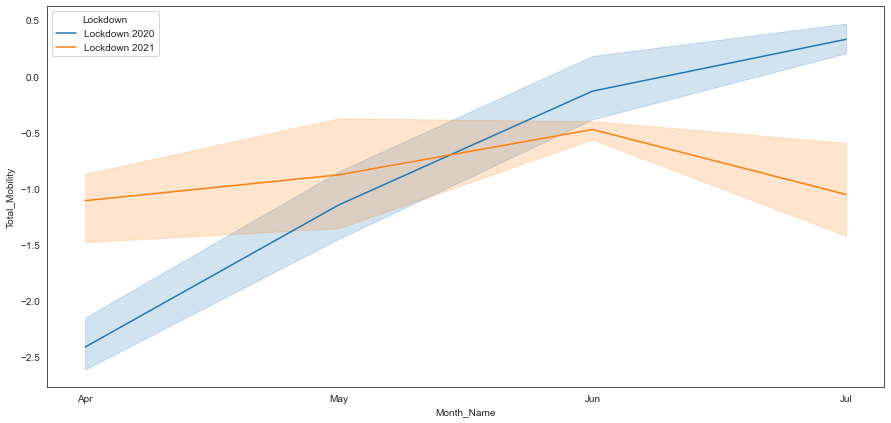

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (15, 7))
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
x="date"
y="value"
# Load an example dataset with long-form data
# Plot the responses for different events and regions
sns.lineplot(x="Month_Name", y="Total_Mobility", hue ='Lockdown',
             data=dfLktotal)
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
# Create a dataframe
dataframe = pd.DataFrame({'Fertilizer': np.repeat(['daily', 'weekly'], 15),
                          'Watering': np.repeat(['daily', 'weekly'], 15),
                          'height': [14, 16, 15, 15, 16, 13, 12, 11,
                                     14, 15, 16, 16, 17, 18, 14, 13, 
                                     14, 14, 14, 15, 16, 16, 17, 18,
                                     14, 13, 14, 14, 14, 15]})
  
  
# Performing two-way ANOVA
model = ols('height ~ C(Fertilizer) + C(Watering) +\
C(Fertilizer):C(Watering)',
            data=dataframe).fit()
result = sm.stats.anova_lm(model, type=2)
  
# Print the result
print(result)

In [122]:
dfLktotal.to_csv('check.csv')

In [115]:
anova = 

,Year,Week_Number,date,new_cases,new_deaths,people_vaccinated,people_fully_vaccinated,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Total_Mobility,No_Mobility,Month,Month_Year,Lockdown,Month_Name
14,2020,15,2020-04-06,-0.65,-0.53,-0.67,-0.60,-2.81,-2.35,-1.77,-1.70,-1.88,2.74,-2.64,2.74,4,Apr-2020,Lockdown 2020,Apr
15,2020,16,2020-04-13,-0.65,-0.54,-0.67,-0.60,-2.84,-2.36,-1.73,-1.64,-1.75,2.77,-2.59,2.77,4,Apr-2020,Lockdown 2020,Apr
16,2020,17,2020-04-20,-0.65,-0.56,-0.67,-0.60,-2.67,-2.29,-1.71,-1.52,-1.38,2.42,-2.42,2.42,4,Apr-2020,Lockdown 2020,Apr
17,2020,18,2020-04-27,-0.65,-0.56,-0.67,-0.60,-2.51,-1.33,-1.42,-1.12,-1.66,2.22,-2.00,2.22,4,Apr-2020,Lockdown 2020,Apr
18,2020,19,2020-05-04,-0.65,-0.56,-0.67,-0.60,-2.19,-0.96,-1.01,-0.84,-1.52,2.11,-1.61,2.11,5,May-2020,Lockdown 2020,May
19,2020,20,2020-05-11,-0.65,-0.57,-0.67,-0.60,-1.91,-0.89,-0.88,-0.58,-0.84,1.62,-1.28,1.62,5,May-2020,Lockdown 2020,May
20,2020,21,2020-05-18,-0.65,-0.57,-0.67,-0.60,-1.46,-0.80,-0.70,-0.31,-0.57,1.42,-0.96,1.42,5,May-2020,Lockdown 2020,May
21,2020,22,2020-05-25,-0.65,-0.56,-0.67,-0.60,-1.22,-0.60,-0.59,-0.10,-0.42,1.28,-0.73,1.28,5,May-2020,Lockdown 2020,May
22,2020,23,2020-06-01,-0.65,-0.56,-0.67,-0.60,-0.84,-0.44,-0.27,0.04,-0.73,1.22,-0.52,1.22,6,Jun-2020,Lockdown 2020,Jun
23,2020,24,2020-06-08,-0.65,-0.57,-0.67,-0.60,-0.65,-0.55,-0.10,0.06,-0.20,0.90,-0.35,0.90,6,Jun-2020,Lockdown 2020,Jun


In [135]:

import scipy.stats as stats
from bioinfokit.analys import stat
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Total_Mobility ~ C(Lockdown)', data=dfLktotal).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

res = stat()
res.anova_stat(df=dfLktotal, res_var='Total_Mobility', anova_model='Total_Mobility ~ C(Lockdown)')
display(res.anova_summary)





,sum_sq,df,F,PR(>F)
C(Lockdown),0.03,1.00,0.05,0.83
Residual,22.95,31.00,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(Lockdown),1.00,0.03,0.03,0.05,0.83
Residual,31.00,22.95,0.74,NaN,NaN


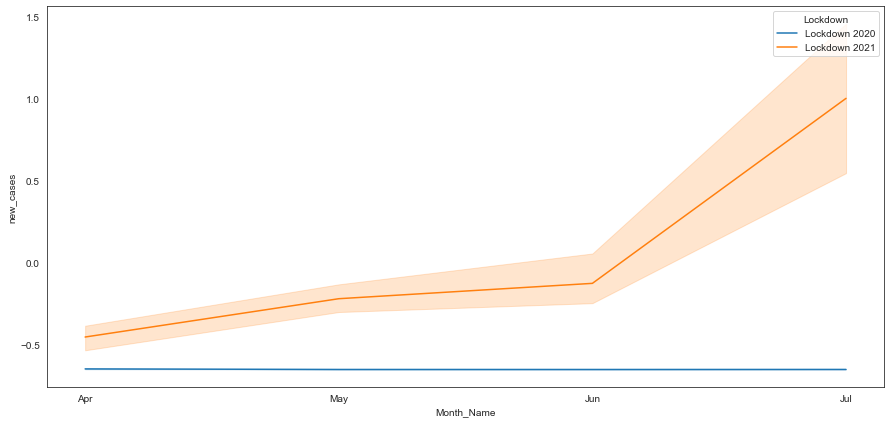

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (15, 7))
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
x="date"
y="value"
# Load an example dataset with long-form data
# Plot the responses for different events and regions
sns.lineplot(x="Month_Name", y="new_cases", hue ='Lockdown',
             data=dfLktotal)
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
#define lag=1, 

#lag=12*(n/100)^{1/4}, n is number of observations in time series
#autolag='AIC' to let the algo define the lag automatically (will choose a the number of lags that yields the lowest AIC)
lag=9